In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## TAKING THE DATASET OF CUSTOMER

In [2]:
df=pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
df.rename(columns={'Exited':'churn'},inplace=True)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
df.shape

(10002, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

## PROCESSING THE DATA

In [7]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'churn'],
      dtype='object')

In [9]:
#checking the duplicated values
df.duplicated().sum()

2

In [10]:
# remove the duplicate values 
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
#checking the null values
df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
churn              0
dtype: int64

In [12]:
# checking the missing columns values then fill the null values 
print(df["Geography"].mode()[0])
print(df["Age"].median())
print(df["HasCrCard"].median())
print(df["IsActiveMember"].median())

France
37.0
1.0
1.0


In [13]:
## fill the missing values using the method (Mean,median,mode)
df["Geography"] = df["Geography"].fillna(df["Geography"].mode()[0])
df["Age"]= df["Age"].fillna(df["Age"].median())
df["HasCrCard"]=df["HasCrCard"].fillna(df["HasCrCard"].median())
df["IsActiveMember"] = df["IsActiveMember"].fillna(df["IsActiveMember"].median())

In [14]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  churn            10000 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.5+ KB


In [16]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.922903,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487128,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
## creating a new df
df_new = df.copy()

In [18]:
# cheking the values Geography columns
df_new["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
df_new["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [20]:
#converting categorical values into numeric values 
from sklearn.preprocessing import OrdinalEncoder
a = ["Geography","Gender"] 
en_ = OrdinalEncoder()     
df_new[a] = en_.fit_transform(df_new[a])

In [21]:
#checking after encoding
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,619,0.0,0.0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,2.0,0.0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0.0,0.0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,0.0,0.0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,2.0,0.0,43.0,2,125510.82,1,1.0,1.0,79084.10,0


In [22]:
#now performing the feature scaling
df_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'churn'],
      dtype='object')

In [23]:
b = ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler

mix_scaler = MinMaxScaler()
df_new[b]= mix_scaler.fit_transform(df_new[b])

In [24]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0.538,0.0,0.0,0.324324,0.2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,2.0,0.0,0.310811,0.1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,0.0,0.0,0.283784,0.1,0.000000,2,0.0,0.0,0.469120,0
4,1.000,2.0,0.0,0.337838,0.2,0.500246,1,1.0,1.0,0.395400,0


In [25]:
x_1 = df_new.iloc[:,:-1]
y_1 = df_new["churn"]
print(x_1)
print(y_1)

       CreditScore  Geography  Gender       Age  Tenure   Balance  \
0            0.538        0.0     0.0  0.324324     0.2  0.000000   
1            0.516        2.0     0.0  0.310811     0.1  0.334031   
2            0.304        0.0     0.0  0.324324     0.8  0.636357   
3            0.698        0.0     0.0  0.283784     0.1  0.000000   
4            1.000        2.0     0.0  0.337838     0.2  0.500246   
...            ...        ...     ...       ...     ...       ...   
9995         0.842        0.0     1.0  0.283784     0.5  0.000000   
9996         0.332        0.0     1.0  0.229730     1.0  0.228657   
9997         0.718        0.0     0.0  0.243243     0.7  0.000000   
9998         0.844        1.0     1.0  0.324324     0.3  0.299226   
10000        0.884        0.0     0.0  0.135135     0.4  0.518708   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                  1        1.0             1.0         0.506735  
1                  1        0.0      

## SPLITING THE DATA INTO TRAINING AND TESTING SET

In [26]:
#SPLITING THE DATA INTO TRAINING AND TEST SET
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_1,y_1,test_size=0.20,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


## LOGISTIC REGRESSION MODEL

In [27]:
#logistic regresssion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

In [28]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
rl_y_pred = lr.predict(x_test)
lr_y_predtrain = lr.predict(x_train)


In [29]:
print("Test_data")
print(confusion_matrix(y_test,rl_y_pred))
print(classification_report(y_test,rl_y_pred))


Test_data
[[1547   41]
 [ 354   58]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1588
           1       0.59      0.14      0.23       412

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000



In [30]:
print("--"*15)
print("Train_data")
print(confusion_matrix(y_train,lr_y_predtrain))
print(classification_report(y_train,lr_y_predtrain))

------------------------------
Train_data
[[6209  166]
 [1332  293]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6375
           1       0.64      0.18      0.28      1625

    accuracy                           0.81      8000
   macro avg       0.73      0.58      0.59      8000
weighted avg       0.79      0.81      0.77      8000



### SCORE OF THE LOGISTIC REGRESSION

In [31]:
# traindata and testdata scoring
lr_test_score  = lr.score(x_test,y_test)
lr_train_score = lr.score(x_train,y_train)

print("Test_data_score",lr_test_score)
print("Train_data_score",lr_train_score)

Test_data_score 0.8025
Train_data_score 0.81275


<function matplotlib.pyplot.show(close=None, block=None)>

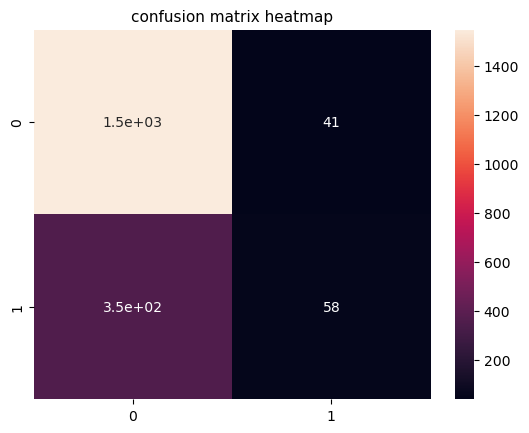

In [32]:
cm=confusion_matrix(y_test,rl_y_pred)
plt.title('confusion matrix heatmap',fontsize=11)
sns.heatmap(cm,annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

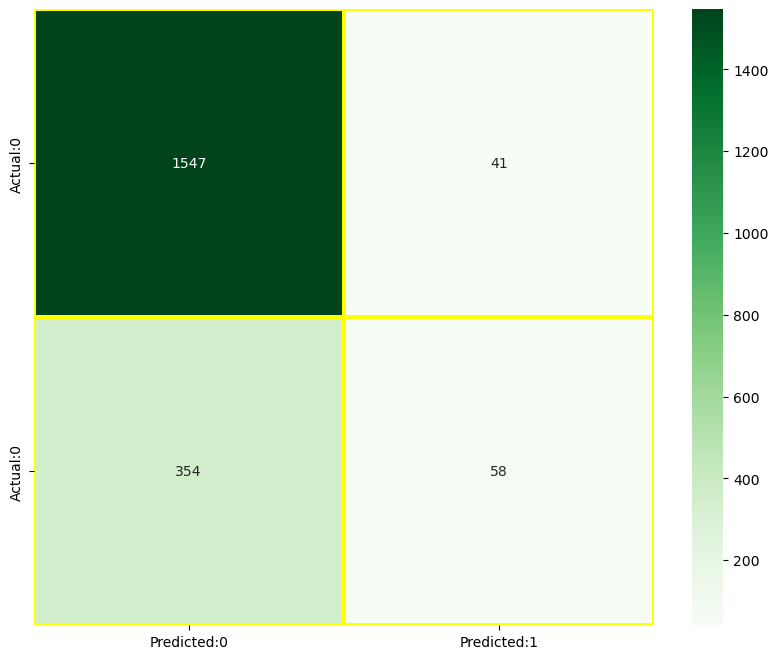

In [33]:
conf=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:0'])
plt.figure(figsize=(10,8))
sns.heatmap(conf,annot=True,fmt='d',cmap='Greens',linecolor='yellow',linewidth=1.5)
plt.show

## DECISION TREE MODEL

In [34]:
#decision Tree
from sklearn.tree import DecisionTreeClassifier


<function matplotlib.pyplot.show(close=None, block=None)>

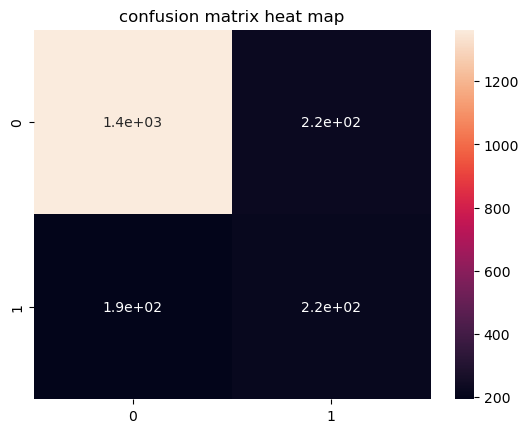

In [35]:
c=DecisionTreeClassifier(criterion='entropy',random_state=0)
c.fit(x_train,y_train)
y_prediction=c.predict(x_test)
cm1=confusion_matrix(y_test,y_prediction)
plt.title('confusion matrix heat map',fontsize=12)
sns.heatmap(cm1,annot=True)
plt.show

In [36]:
c_y_pred = c.predict(x_test)
c_y_predtrain = c.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

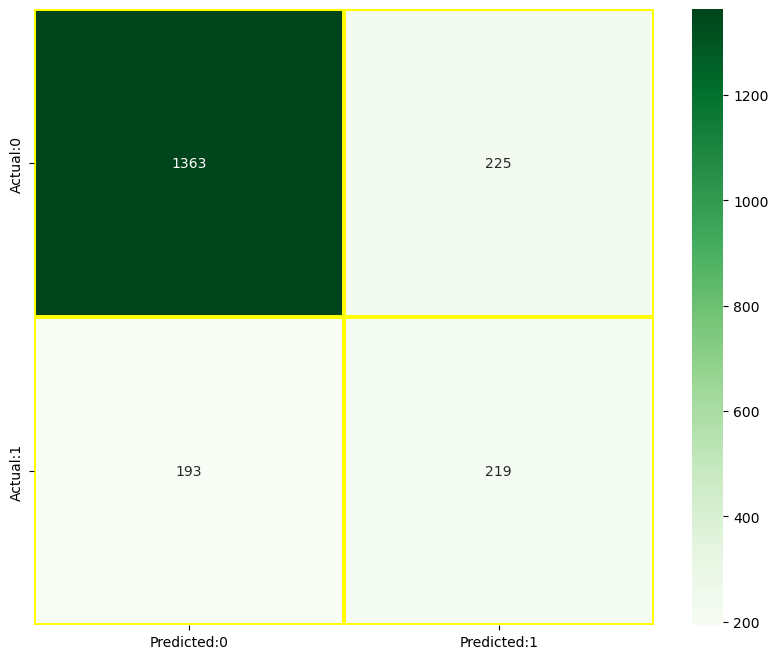

In [37]:
cm3=confusion_matrix(y_test,c_y_pred)
conf2=pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(10,8))
sns.heatmap(conf2,annot=True,fmt='d',cmap='Greens',linecolor='yellow',linewidth=1.5)
plt.show

In [91]:
# traindata and testdata scoring
c_test_score  = c.score(x_test,y_test)
c_train_score = c.score(x_train,y_train)

print("Test_data_score",c_test_score)
print("Train_data_score",c_train_score)

Test_data_score 0.9575
Train_data_score 0.958375


In [39]:

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2, random_state=42)

# Train your model (replace with your specific model)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Make predictions on the test set
c_y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, c_y_pred)
report = classification_report(y_test, c_y_pred)

print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[1374  233]
 [ 191  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.46      0.51      0.49       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.80      0.79      0.79      2000



In [40]:
c_y_pred = c.predict(x_test)
c_y_predtrain = c.predict(x_train)

## SCORE OF DECISION TREE

In [41]:
# traindata and testdata scoring
c_test_score  = c.score(x_test,y_test)
c_train_score = c.score(x_train,y_train)

print("Test_data_score",c_test_score)
print("Train_data_score",c_train_score)

Test_data_score 0.9575
Train_data_score 0.958375


## RANDOM TREE FOREST MODEL

In [42]:
#Random tree forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

RF.fit(x_train,y_train)

RF_y_pred = RF.predict(x_test)

print(confusion_matrix(y_test,RF_y_pred))
print(classification_report(y_test,RF_y_pred))

[[1606    1]
 [ 353   40]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1607
           1       0.98      0.10      0.18       393

    accuracy                           0.82      2000
   macro avg       0.90      0.55      0.54      2000
weighted avg       0.85      0.82      0.76      2000



In [43]:
RF_y_pred = RF.predict(x_test)
RF_y_predtrain = RF.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

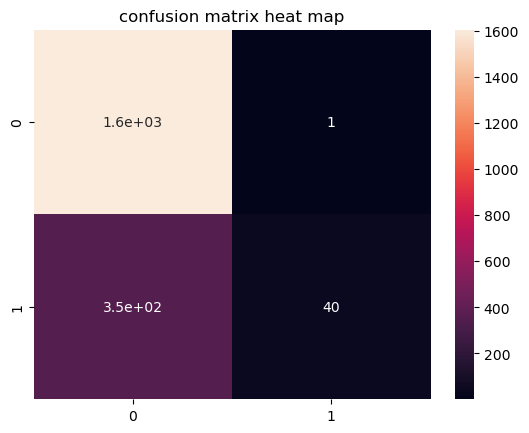

In [44]:
cm2=confusion_matrix(y_test,RF_y_pred)
conf=pd.DataFrame(data=cm2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:0'])
R=RandomForestClassifier(criterion='entropy',random_state=0)
R.fit(x_train,y_train)
RF_prediction=R.predict(x_test)

plt.title('confusion matrix heat map',fontsize=12)
sns.heatmap(cm2,annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

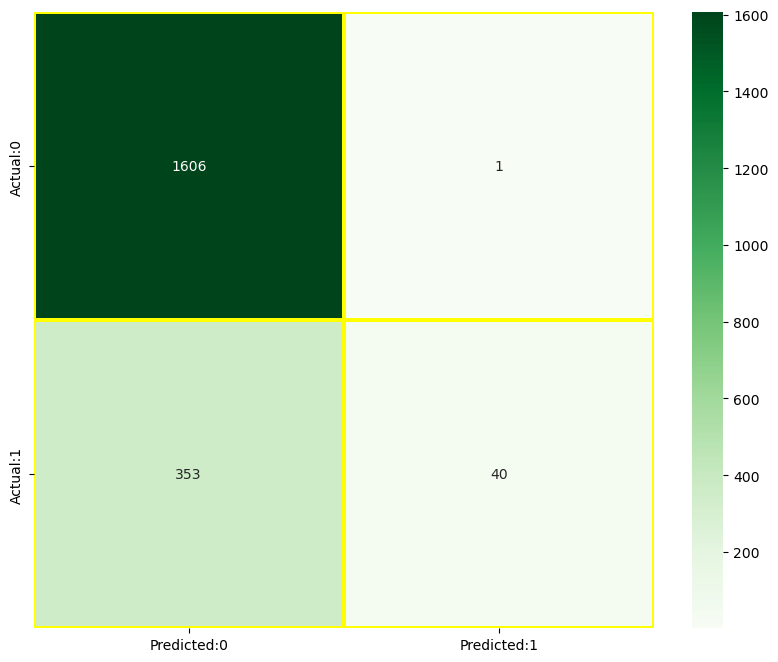

In [45]:
cm3=confusion_matrix(y_test,RF_y_pred)
conf2=pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(10,8))
sns.heatmap(conf2,annot=True,fmt='d',cmap='Greens',linecolor='yellow',linewidth=1.5)
plt.show

## SCORE OF THE RANDOM TREE FOREST

In [46]:
# traindata and testdata scoring
R_test_score  = R.score(x_test,y_test)
R_train_score = R.score(x_train,y_train)

print("Test_data_score",R_test_score)
print("Train_data_score",R_train_score)

Test_data_score 0.8695
Train_data_score 1.0


## SUPPORT VECTOR MACHINE(SVM) 

In [47]:
#Support vector machine
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)


SVC()

In [48]:
sv_y_pred = svm.predict(x_test)
print(confusion_matrix(y_test,sv_y_pred))
print(classification_report(y_test,sv_y_pred))

[[1578   29]
 [ 268  125]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1607
           1       0.81      0.32      0.46       393

    accuracy                           0.85      2000
   macro avg       0.83      0.65      0.69      2000
weighted avg       0.85      0.85      0.82      2000



In [49]:
sv_y_pred = svm.predict(x_test)
sv_y_predtrain = svm.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

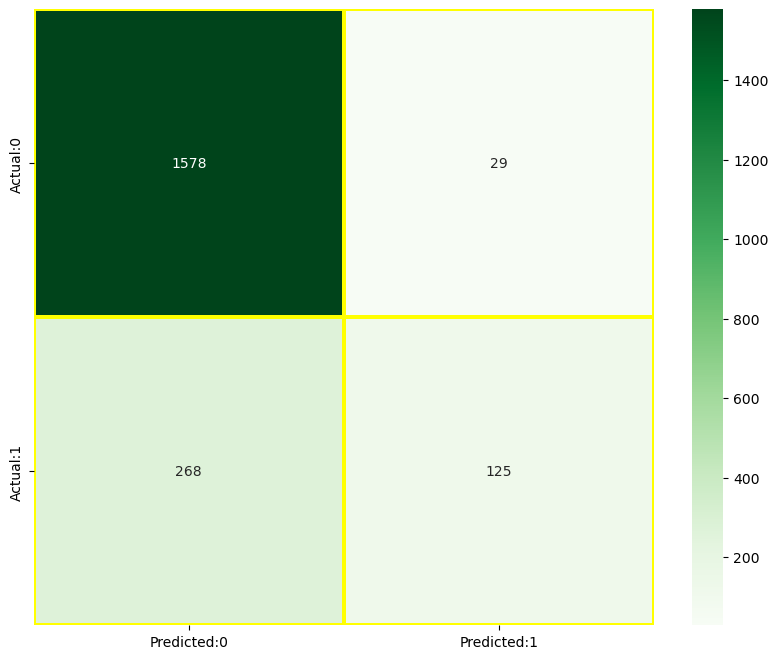

In [50]:
cm3=confusion_matrix(y_test,sv_y_pred)
conf2=pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(10,8))
sns.heatmap(conf2,annot=True,fmt='d',cmap='Greens',linecolor='yellow',linewidth=1.5)
plt.show

## SCORE OF THE SVM

In [93]:
# traindata and testdata scoring
svm_test_score  = svm.score(x_test,y_test)
svm_train_score = svm.score(x_train,y_train)

print("Test_data_score",svm_test_score)
print("Train_data_score",svm_train_score)

Test_data_score 0.8515
Train_data_score 0.850375


## model comparision

In [ ]:
#model comparision
data = {"model_name":["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier"," SVC"],
       "accuracy_test_data":[lr_test_score,c_test_score ,R_test_score,svm_test_score],
       "accuracy_train_data":[lr_train_score,c_train_score,R_train_score,svm_train_score]}
data = pd.DataFrame(data)
data

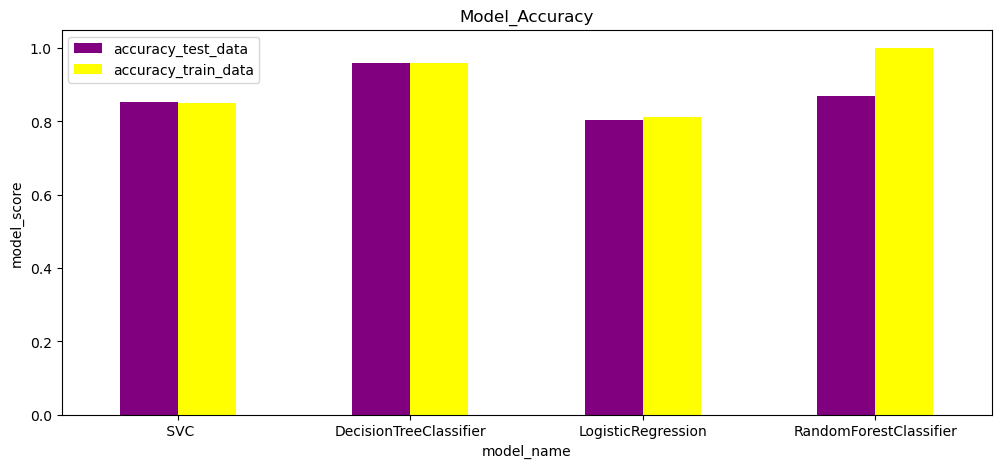

In [79]:
patt = sns.color_palette("magma_r",4)

pd.pivot_table(data=data,values=["accuracy_test_data",
                                 "accuracy_train_data"],
               index=["model_name"]).plot.bar(ylabel = "model_score",
                                              title="Model_Accuracy",color=["purple","yellow"],rot=0,figsize=(12,5))
plt.show()


### RANDOM TREE FOREST CLASSIFIER PERFORM WELL ON OUR DATASET 

## TAKING ANOTHER DATASET 

In [80]:
df1=pd.read_csv("churn1.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
df1.shape

(7043, 21)

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [83]:
df1.drop(["customerID"],axis=1,inplace=True)

In [84]:
#checking the duplicated values
df1.duplicated().sum()

22

In [85]:
# remove the duplicate values 
df1 = df1.drop_duplicates()
df1.duplicated().sum()

0

In [86]:
#checking the null values
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [87]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.0,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.0,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.4,89.9,118.75


In [88]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder for each categorical column
label_encoder = LabelEncoder()

# List of categorical column names
categorical_columns = ["gender", "Partner", "Dependents", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

# Iterate through each categorical column and transform it
for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])


In [89]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,Yes,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,Yes,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,No,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,Yes,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [90]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
# Replace empty strings with 0
df1['TotalCharges'] = df1['TotalCharges'].replace(' ', 0)


In [66]:
# Convert the column to float data type
df1['TotalCharges'] = df1['TotalCharges'].astype(float)


In [67]:
b1 = ["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler

mix_scaler = MinMaxScaler()
df1[b1]= mix_scaler.fit_transform(df1[b1])

In [68]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,No,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0
1,1,0,0,0,0.472222,Yes,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0
2,1,0,0,0,0.027778,Yes,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1
3,1,0,0,0,0.625000,No,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0
4,0,0,0,0,0.027778,Yes,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1


In [69]:
x_2 = df_new.iloc[:,:-1]
y_2 = df_new["churn"]
print(x_2)
print(y_2)

       CreditScore  Geography  Gender       Age  Tenure   Balance  \
0            0.538        0.0     0.0  0.324324     0.2  0.000000   
1            0.516        2.0     0.0  0.310811     0.1  0.334031   
2            0.304        0.0     0.0  0.324324     0.8  0.636357   
3            0.698        0.0     0.0  0.283784     0.1  0.000000   
4            1.000        2.0     0.0  0.337838     0.2  0.500246   
...            ...        ...     ...       ...     ...       ...   
9995         0.842        0.0     1.0  0.283784     0.5  0.000000   
9996         0.332        0.0     1.0  0.229730     1.0  0.228657   
9997         0.718        0.0     0.0  0.243243     0.7  0.000000   
9998         0.844        1.0     1.0  0.324324     0.3  0.299226   
10000        0.884        0.0     0.0  0.135135     0.4  0.518708   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                  1        1.0             1.0         0.506735  
1                  1        0.0      

In [70]:
#SPLITING THE DATA INTO TRAINING AND TEST SET
from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test = train_test_split(x_2,y_2,test_size=0.20,random_state=43)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


## RANDOM FOREST CLASSIFIER

In [71]:
#Random tree forest
from sklearn.ensemble import RandomForestClassifier

RF1 = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)

RF1.fit(x1_train,y1_train)

RF1_y_pred = RF1.predict(x1_test)

print(confusion_matrix(y1_test,RF1_y_pred))
print(classification_report(y1_test,RF1_y_pred))

[[1588    0]
 [ 385   27]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1588
           1       1.00      0.07      0.12       412

    accuracy                           0.81      2000
   macro avg       0.90      0.53      0.51      2000
weighted avg       0.85      0.81      0.73      2000



In [72]:
RF1_y_pred = RF1.predict(x1_test)
RF1_y_predtrain = RF1.predict(x1_train)

<function matplotlib.pyplot.show(close=None, block=None)>

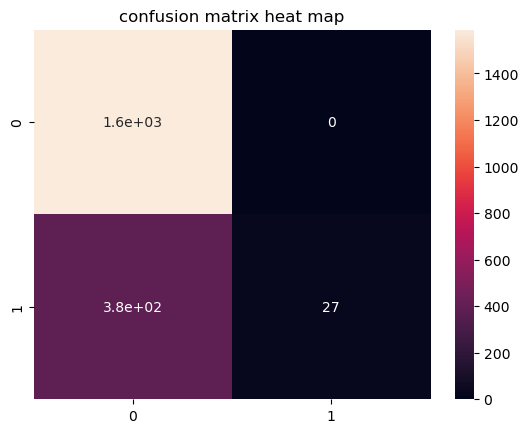

In [73]:
cm_2=confusion_matrix(y1_test,RF1_y_pred)
conf_1=pd.DataFrame(data=cm_2,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:0'])
R_1=RandomForestClassifier(criterion='entropy',random_state=0)
R_1.fit(x1_train,y1_train)
RF1_prediction=R_1.predict(x1_test)

plt.title('confusion matrix heat map',fontsize=12)
sns.heatmap(cm_2,annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

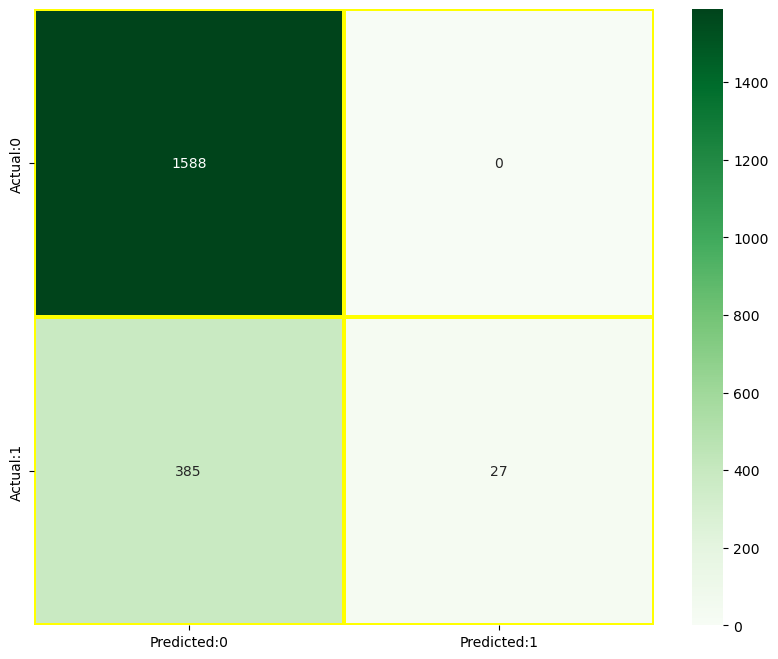

In [74]:
cm_3=confusion_matrix(y1_test,RF1_y_pred)
conf_2=pd.DataFrame(data=cm_3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(10,8))
sns.heatmap(conf_2,annot=True,fmt='d',cmap='Greens',linecolor='yellow',linewidth=1.5)
plt.show

## SCORE OF THE RANDOM TREE FOREST ON NEW DATASET

In [75]:
# traindata and testdata scoring
R1_test_score  = R_1.score(x1_test,y1_test)
R1_train_score = R_1.score(x1_train,y1_train)

print("Test_data_score",R1_test_score)
print("Train_data_score",R1_train_score)

Test_data_score 0.8625
Train_data_score 1.0


## PERFORMING THE COMPARISION BETWEEN TWO DATASET(DF AND DF1)

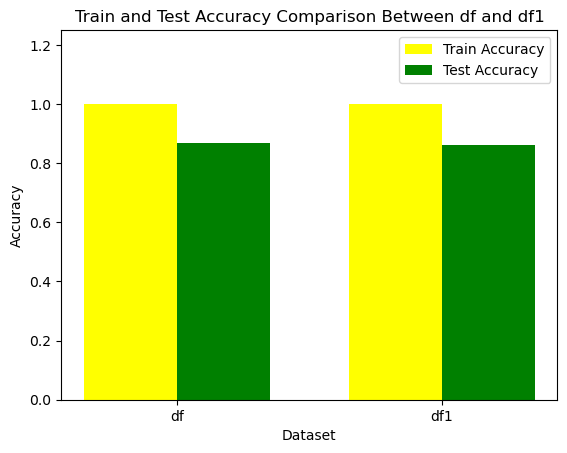

In [76]:

# Calculate and store the accuracies
train_accuracies = [R_train_score, R1_train_score]
test_accuracies = [R_test_score, R1_test_score]
datasets = ['df', 'df1']

# Set the positions for the bars
x = np.arange(len(datasets))

# Define the width of the bars
width = 0.35

# Create a grouped bar chart for train and test accuracies
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='yellow')
bar2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='green')

# Set labels, title, and legend
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracy Comparison Between df and df1')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

# Display the grouped bar chart
plt.ylim(0,1.25)  # Set the y-axis limit to match the accuracy range (0-1)
plt.show()
